### Шаг 1.  Выгрузка данных

In [1]:
import pandas as pd

pd.options.display.max_columns = None
estate_data=pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
print(estate_data.info())
estate_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


### Вывод

Файл с данными загружен,но подлежит многой обработке ,прежде тем ,как начать анализ, ибо все данные слиплись в одну строку с одним столбцом.<br><br>Первом делом нужно привести таблицу к рабочему виду, разделив данные и столбцы. Для этого укажим разделитель в функции read_csv. И выведем нужную таблицу , прошлое закомментировал для наглядности.<br><br>Сразу можно увидеть , что существует множество столбцов с пропущенными значениями,которыми нужно заняться в дальнейшем и отыскать логическую зависимость ,если она там есть<br><br>Нужно определить подход к каждому из столбцов и понять какие данные можно отбросить в случае чего , и какого рода пропуски будут в определенных столбцах

### Шаг 2. Предобработка данных

In [2]:
#filling the NaNs

#dropping na values in city names
estate_data.dropna(subset=['locality_name'], inplace = True)

In [3]:
#BALCONY filling
estate_data['balcony'].fillna(value = 0, inplace = True)

In [4]:
#filling LIVING_AREA,KITCHEN_AREA
estate_data['living_area'].fillna(value = estate_data['total_area'] - estate_data['kitchen_area'],inplace = True)

estate_data['kitchen_area'].fillna(value = estate_data['total_area'] - estate_data['living_area'],inplace = True)

estate_data['living_area'].fillna(value = estate_data['total_area']/2,inplace = True)

estate_data['kitchen_area'].fillna(value = estate_data['total_area']/2,inplace = True)

In [5]:
#CEILING_HEIGHT filling look at the weird numbers
ceiling_height_mean = estate_data['ceiling_height'].mean()
estate_data['ceiling_height'].fillna(value = ceiling_height_mean, inplace = True)

In [6]:
#filling and PARKS/PONDS info
estate_data.loc[(estate_data['parks_nearest'].isna()) & ((estate_data['parks_around3000'] == 0) | (estate_data['parks_around3000'].isna())), 'parks_nearest'] = 0
estate_data.loc[(estate_data['ponds_nearest'].isna()) & ((estate_data['ponds_around3000'] == 0) | (estate_data['ponds_around3000'].isna())), 'ponds_nearest'] = 0
#if no distance and nan in around3000 means no parks at all, didnt check if there is a distance and nan in around 3000 beacause all of the values were filled with the first method
estate_data.loc[(estate_data['parks_nearest'] == 0) & (estate_data['parks_around3000'].isna()) ,'parks_around3000'] = 0
estate_data.loc[(estate_data['ponds_nearest'] == 0) & (estate_data['ponds_around3000'].isna()) ,'ponds_around3000'] = 0

In [7]:
#filling IS_APARTMENT based on thinking its NaN because it was supposed to be False because of it was meant to be filled in case of True
estate_data['is_apartment'].fillna(value = False, inplace = True)

In [8]:
#filling CENTER DISTANCE
distance_to_center = estate_data.pivot_table(index = 'locality_name',values='cityCenters_nearest',aggfunc=('mean')).sort_values(by='cityCenters_nearest')
for i in range(distance_to_center.shape[0]):
    distance = distance_to_center['cityCenters_nearest'][i]
    estate_data.loc[estate_data['locality_name'] == distance_to_center.index[i],'cityCenters_nearest'] = estate_data.loc[estate_data['locality_name'] == distance_to_center.index[i],'cityCenters_nearest'].fillna(distance)
#filling AIRPORT DISTANCE
distance_to_airport = estate_data.pivot_table(index = 'locality_name',values='airports_nearest',aggfunc=('mean')).sort_values(by='airports_nearest')
for k in range(distance_to_airport.shape[0]):
    distance_airport = distance_to_airport['airports_nearest'][k]
    estate_data.loc[estate_data['locality_name'] == distance_to_airport.index[k],'airports_nearest'] = estate_data.loc[estate_data['locality_name'] == distance_to_airport.index[k],'airports_nearest'].fillna(distance_airport)
#estate_data['airports_nearest'].sort_values(ascending=False) checked for the furthest info ,
#I assume that all NaN left there ,because it is too far to say how close it is , so we will assign the furthest out of all of the data
# we will think that all leftovers 100 000 far from the city and airport
estate_data['airports_nearest'].fillna(value = 100000, inplace = True)
estate_data['cityCenters_nearest'].fillna(value = 100000, inplace = True)

In [9]:
#filling FLOORS_TOTAL
median_total_floors = estate_data.pivot_table(index = 'locality_name',values='floors_total',aggfunc=('median')).sort_values(by='floors_total')
for j in range(median_total_floors.shape[0]):
    median = median_total_floors['floors_total'][j]
    estate_data.loc[estate_data['locality_name'] == median_total_floors.index[j],'floors_total'] = estate_data.loc[estate_data['locality_name'] == median_total_floors.index[j],'floors_total'].fillna(median)

In [10]:
#filling DAYS_EXPOSITION 0 will mean that its not sold yet
estate_data['days_exposition'].fillna(value = 0, inplace = True)

In [11]:
#changing value types

estate_data['last_price'] = estate_data['last_price'].astype('int')
estate_data['balcony'] = estate_data['balcony'].astype('int')
estate_data['floors_total'] = estate_data['floors_total'].astype('int')
estate_data['parks_around3000'] = estate_data['parks_around3000'].astype('int')
estate_data['ponds_around3000'] = estate_data['ponds_around3000'].astype('int')
estate_data['days_exposition'] = estate_data['days_exposition'].astype('int')
estate_data['first_day_exposition']=pd.to_datetime(estate_data['first_day_exposition'],format = '%Y-%m-%dT%H:%M:%S')

estate_data.reset_index(drop=True)

print(estate_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23650 non-null int64
last_price              23650 non-null int64
total_area              23650 non-null float64
first_day_exposition    23650 non-null datetime64[ns]
rooms                   23650 non-null int64
ceiling_height          23650 non-null float64
floors_total            23650 non-null int64
living_area             23650 non-null float64
floor                   23650 non-null int64
is_apartment            23650 non-null bool
studio                  23650 non-null bool
open_plan               23650 non-null bool
kitchen_area            23650 non-null float64
balcony                 23650 non-null int64
locality_name           23650 non-null object
airports_nearest        23650 non-null float64
cityCenters_nearest     23650 non-null float64
parks_around3000        23650 non-null int64
parks_nearest           23650 non-null float64
ponds_around300

<h1>Вывод</h1>

Привели таблицу к рабочему виду:
<br>
<br>
Работа с пропусками:

<ul>
    <li>Сначала отбросили все строки с пропущенными значениями в столбце с городами , так как таких было немного(49)</li>
    <li>Пропуски в балконах предположили ,что означают их отсутсвие и заполнили нулями</li>
    <li>Данные связанных с площадями сначала постарался заполнить базируясь на данные в столбце <i>total_area</i> , так как зная <i>living_area или kitchen_area</i> можно путем вычетания из общей вычислить недостоющую , а когда оба пустые , заменили их просто половинкой от общей площади</li>
    <li>Значения в <i>ceilling_height</i> заполнили стредним , ведь высота потолка везде примерно средняя</li>
    <li>Парки и пруды заполняем так ,что если вокруг нету парков/прудов (равны 0 или NaN) ,то заполняем пропуск до ближайшего парка/пруда 0 . Дальше наоборот рассмотрел случай , что если расстояние до парка 0 ,то пропуск заполнить 0 ,но делал все эти усложнения , ибо считал ,что возможен случай ,что есть пропущенное значение в количестве парков ,но есть расстояние до ближайшего парка ,тогда бы менял значение на 1</li>
    <li>Заполняем булевые значения столбца <i> is_apartment</i> False ,ибо предполагаем , что отсутвие значений является тем ,что помещение не является апартаментами(возможно подумали при заполнении , что является обязательным только для тех , у кого апартаменты)</li>
    <li>Расстояния до центра и до аэропорта заполняем по средней в каждом населенном пункте ,оставшиеся населенные пункты , которые единственные в своем роде ,скорей всего, находятся слишком далеко ,чтобы давать какие-то значения до центра города или до аэропорта , поэтому посмотрели самые высокие значения ,это около 85000,поэтому присваиваем значение намного большее 100000</li>
    <li>Количество этажей тоже может зависеть от населенного пункта , ведь где-то преобладают пяти этажки , где-то высотки , а где-то дачные поселки , поэтому заполняем также значения базируясь от населенного пункта и берем медиану среди них</li>
    <li>Дней размещенного объявления заполняем 0 , основываясь на том , что это говорит о том , что объявление просто еще не продалось и до сих пор стоит на продаже </li>
</ul>
<br>
Изменение типов данных:
<ul>
    <li>Цену на момент снятия с публикации меняем на целочисленное , так как числа достаточно большие и можно принебречь значением после запятой</li>
    <li>Количество этажей,количество парков , количество прудов,количество балконов, количество дней не могут быть вещественными ,поэтому их тоже меняем на целые</li>
    <li>Формат времени тоже записан не корректно в столбце <i>first_day_exposition</i>,поменяли формат на datetime</li>

### Шаг 3. Расчет => Создание новых столбцов

In [12]:
#suqare feet price
estate_data['square_feet_price'] = estate_data['last_price']/estate_data['total_area']
estate_data['square_feet_price'] = estate_data['square_feet_price'].astype('int')

In [13]:
#splitting datetime into 3 seperate columns
estate_data['weekday'] = estate_data['first_day_exposition'].dt.weekday
estate_data['month'] = estate_data['first_day_exposition'].dt.month
estate_data['year'] = estate_data['first_day_exposition'].dt.year

In [14]:
#estimating what floor it is
def estimated_floor(data):
    if data['floor'] == 1:
        return 'первый'
    if data['floor'] == data['floors_total']:
        return 'последний'
    else:
        return 'другой'
estate_data['estimated_floor'] = estate_data.apply(estimated_floor, axis = 1)

#didn't work
#estate_data['estimated_floor'] = estate_data['floor'].where(estate_data['floor'] != 1,'первый')
#estate_data['estimated_floor'] = estate_data['floor'].where(estate_data['floor'] != estate_data['floors_total'],'последний')
#estate_data['estimated_floor'] = estate_data['floor'].where((estate_data['floor'] == 1)& (estate_data['floor'] == estate_data['floors_total']),'другой')

In [15]:
#ratio living area to total area
estate_data['living_total_ratio'] = estate_data['living_area'] / estate_data['total_area']

#ration kitchen area to total area
estate_data['kitchen_total_ratio'] = estate_data['kitchen_area'] / estate_data['total_area']

estate_data['ceiling_height'].sort_values()
#estate_data.head()

22590      1.00
5712       1.20
16934      1.75
11352      2.00
4212       2.00
          ...  
21824     27.00
21377     27.50
3148      32.00
22336     32.00
22869    100.00
Name: ceiling_height, Length: 23650, dtype: float64

<h1>Вывод</h1>
<br>
Подготвили новые столбцы с данными , по которым можно провести анализ для заключения параметров, важных для конечной стоимости. Узнали стоимость квадратного метра , влияет ли дата , а именно день недели , месяц или год от продажи квартиры , этаж квартиры прибавляет ли ей стоимости, и отношение жилой и кухонной площади к общей


### Шаг 4. Исследовательский анализ данных

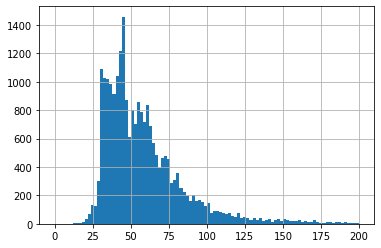

In [16]:
#plotting hists
import matplotlib.pyplot as plt

#estate_data['total_area'].hist(bins=100)
estate_data['total_area'].hist(bins=100,range=(0,200))
plt.show()

<strong>Гистограмма общей площади</strong>
<br>
Распределение выглядт нормальным ,начиная после 150-200м<sup>2</sup> можно наблюдать хвост у графика. Будем смотреть на этот хвост в будущем , а сейчас построим гистограмму от 0 до 200,чтобы подробнее рассмотреть
.Наибольшее количество квартир здесь видно сразу ,что с площадью 40-50м<sup>2</sup>

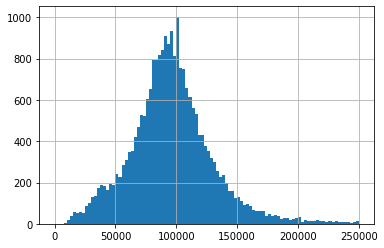

In [17]:
#estate_data['square_feet_price'].hist(bins=100)
estate_data['square_feet_price'].hist(bins=100,range=(0,250000))
plt.show()

<strong>Гистограмма цены</strong>
<br>
Распределение здесь тоже выглядит нормальным , но также имеет длинный хвост , примерно после отметки в 250000 за м<sup>2</sup> Также обратим на этот хвост в будущем и построим гистограмму от 0 до 250000,чтобы более подробно изучить основную массу. Видно ,что основная масса квартир приходится на около 100000 за м<sup>2</sup>

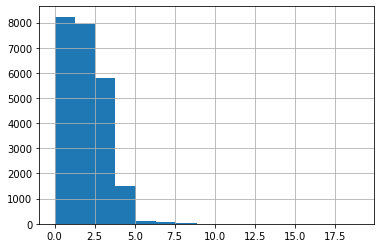

In [18]:
estate_data['rooms'].hist(bins=15)
plt.show()

<strong>Гистограмма количества комнат</strong>
<br>
Видно сразу ,что есть много аномальных значений с количеством комнат равных 0 ,посмотрев с помощью метода value_counts() видно ,что таких значений 197 ,также хвост начинается после 8-9 комнат . Основная масса квартир приходится с 1-3 комнат

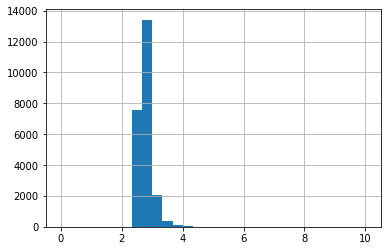

In [19]:
#estate_data['ceiling_height'].hist(bins=100)
estate_data['ceiling_height'].hist(bins=30, range=(0,10))
plt.show()

<strong>Гистограмма высота потолка</strong>
<br>
Сразу видно ,что у данного столбца есть длинный хвост ,который просто выходит за пределы разумного , высота потолка доходит до 100 метров. Посмотрим сразу на данные без длинного хвоста ,ибо очевидно ,что данные там заполнены не верно. Возьмем данные до 10 метров и посмотрим основную массу. Видно ,что основная масса квартир имеет потолки 2-3 м

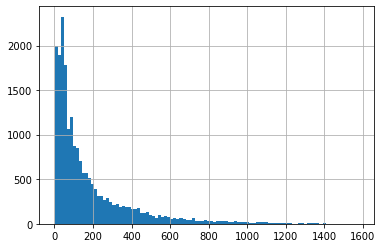

In [20]:
sold_data = estate_data[estate_data['days_exposition'] != 0]
sold_data['days_exposition'].hist(bins=100)
plt.show()

<strong>Гистограмма кол-во дней продавалась кв</strong>
<br>
По гистограмме видно , что основная масса продается за пол год года ,но хвост уходит до 4+ лет

Среднее: 180.7531998045921
Медиана: 95.0


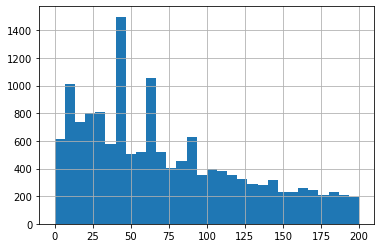

In [21]:
print('Среднее:',sold_data['days_exposition'].mean())
print('Медиана:',sold_data['days_exposition'].median())
sold_data['days_exposition'].hist(bins=30,range=(0,200))
plt.show()

В таблице присутствуют выбросы , которые искажают действительность среднего значения , поэтому как точку опоры будем использовать медиану. Будем считать ,что до 95 дней продажа быстрая, а слишком долгая , посмотрев из первой гистограммы , можно предположить после 600 дней
<br>
<br>
<i>Удалим все редкие и выбивающие значения ,в случае с потолками можно заменить средней стандартной высотой в 2.7,где Минимальная высота потолка определяется СНиП как 2,5 и 1,8 для помещений , так что все потолки ниже 1.8 и потолки выше 5 метров заменим на средний 2.7</i>

In [22]:
#ceiling_height adjustment
estate_data.loc[(estate_data['ceiling_height'] > 5) | (estate_data['ceiling_height'] < 1.8), 'ceiling_height'] = 2.7
estate_data.loc[estate_data['rooms']==0,'rooms'] = 1
#total_area filter
filtered_estate = estate_data.query('total_area < 125 & days_exposition != 0 & days_exposition < 600 & rooms < 8 & square_feet_price < 200000')
filtered_estate_first_relation = estate_data.query('total_area < 125 & days_exposition != 0 & days_exposition < 600 & rooms < 8 & square_feet_price < 200000')[['last_price','total_area','rooms','cityCenters_nearest']]#,'estimated_floor','weekday','month','year']]
filtered_estate_second_relation = estate_data.query('total_area < 125 & days_exposition != 0 & days_exposition < 600 & rooms < 8 & square_feet_price < 200000')[['last_price','weekday','month','year','estimated_floor']]
#estate_data[estate_data['rooms']==0]['total_area'].sort_values().describe()


Заполнили значения потолков средним нормальным значением в 2.7 , количество нулевых комнат с помощью метода describe поняли ,что в основном с 30 м<sup>2</sup>Изучите, зависит ли цена от квадратного метра, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.

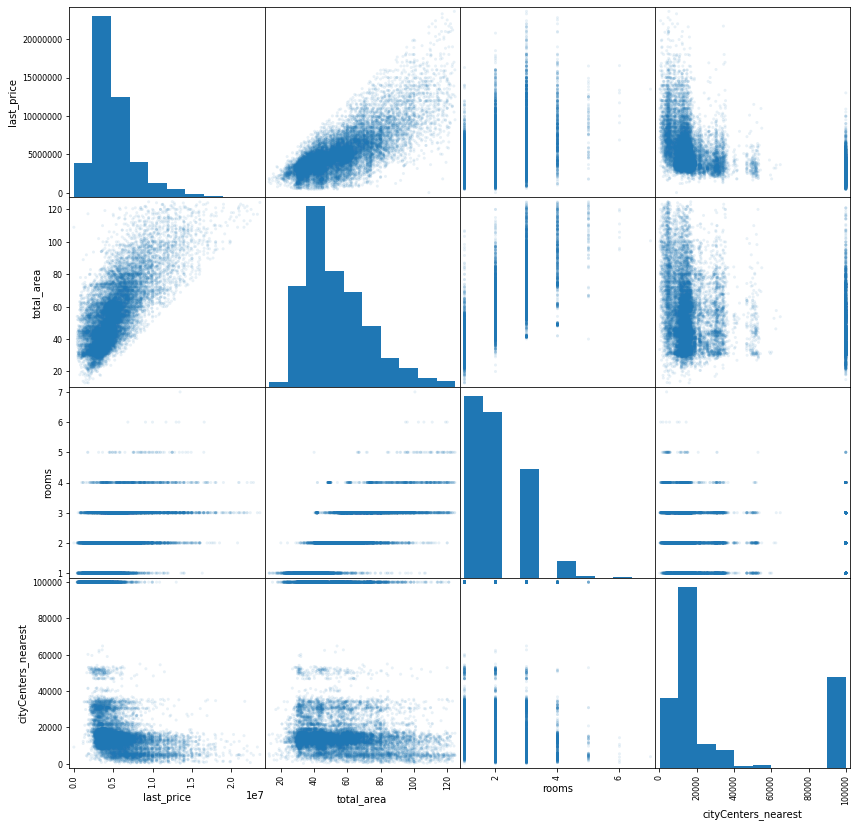

In [23]:
filtered_estate.head()
pd.plotting.scatter_matrix(filtered_estate_first_relation,figsize=(14,14),grid=True,alpha=0.1);

<ul>
<li>Чем ближе город к центру , тем дороже помещение 
<li>Чем больше площадь ,тем дороже помещение
<li>Количество комнат влияют не так однозначно , но самые дорогие квартиры с 3-4 комнатами

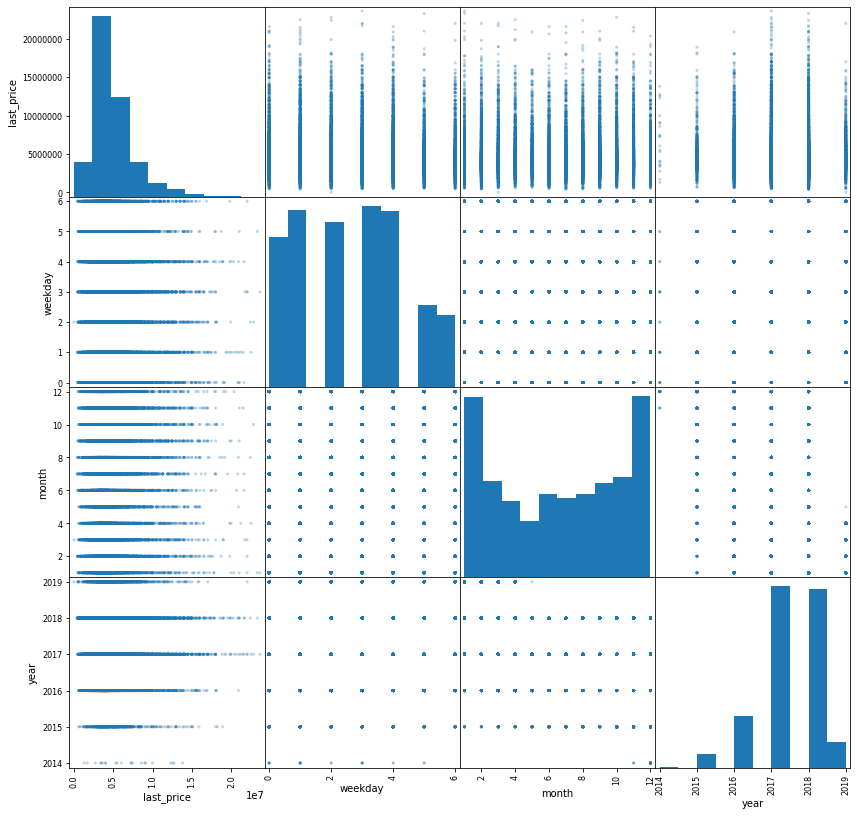

In [24]:
pd.plotting.scatter_matrix(filtered_estate_second_relation,figsize=(14,14),grid=True,alpha=0.3);

<ul>
    <li> день недели не играет сильной роли , но видно , что есть более дорогие продажи ближе к середине недели
        <li>С месяцем тоже самое ,что и со дняи ,но тут видно ,что есть небольшая разница с началом года и летнями месяцами
            <li>С годом зато видна сразу зависимость , в 2017 и 2018 году самые большие показатели 

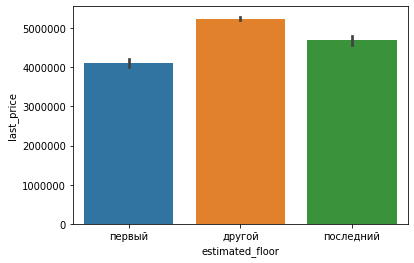

In [25]:
import seaborn as sns
sns.barplot(x='estimated_floor',y='last_price',data=filtered_estate);

Стоимость этажей на первом и последних этажей играет не слабую роль, Помещения дороже между ними

In [26]:
top10_cities = filtered_estate.pivot_table(index = 'locality_name',values='square_feet_price',aggfunc=['count','mean'])#.sort_values('square_feet_price',ascending = False).head(10)
top10_cities.columns=['counts','mean_square_price']
top10_cities = top10_cities.sort_values(by='counts',ascending=False).head(10)
top10_cities
#filtered_estate

,counts,mean_square_price
locality_name,,
Санкт-Петербург,12020,106096.809401
посёлок Мурино,497,85966.674044
посёлок Шушары,393,77954.251908
Всеволожск,316,66892.882911
Колпино,297,74646.080808
посёлок Парголово,292,89471.921233
деревня Кудрово,276,92706.195652
Пушкин,274,100549.197080
Гатчина,247,68331.728745


Самая дорогая цена за квадратный метр , как и ожидалось в топ городе , самая дешевая в данном списке как раз с самым наименьшим количеством

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,cityCenters_nearest_km,square_feet_price
0,0,123016.022727
1,1,122874.157895
2,2,114074.482143
3,3,111511.508306
4,4,123800.048544
5,5,122069.765351
6,6,122202.095563
7,7,121450.925267
8,8,113898.860082
9,9,107095.205725


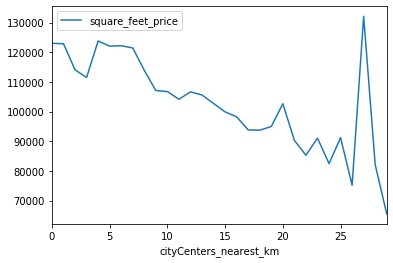

In [27]:
saint_petersburg_data = filtered_estate[filtered_estate['locality_name'] == 'Санкт-Петербург']
saint_petersburg_data['cityCenters_nearest_km'] = (saint_petersburg_data['cityCenters_nearest']/1000).astype('int')
mean_km_center = saint_petersburg_data.pivot_table(index = 'cityCenters_nearest_km',values ='square_feet_price',aggfunc='mean')
mean_km_center.reset_index(inplace=True)
mean_km_center.plot(x='cityCenters_nearest_km',y='square_feet_price')#,kind='scatter')
mean_km_center

<ul>
    <li>Есть выброс на 27 км от центра с самой высокой отметкой,видимо у кого-то там дом-вилла или из золота
        <li>центром города будем счиатать квартиры близкие к 7км , после этого идет резки спад

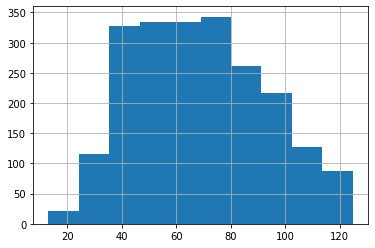

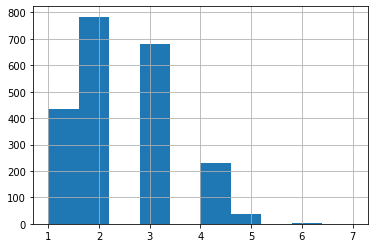

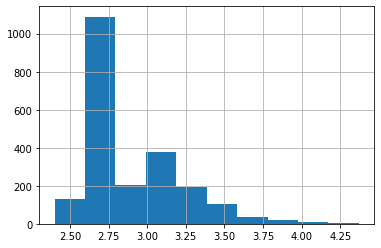

In [28]:
saint_petersburg_center = saint_petersburg_data.query('cityCenters_nearest_km < 8')
saint_petersburg_center['total_area'].hist()
plt.show()
saint_petersburg_center['rooms'].hist()
plt.show()
saint_petersburg_center['ceiling_height'].hist()
plt.show()

<ul>
    <li>Площадь в центре варьируется от 40 до 80 м<sup>2</sup></li>
    <li>Основное количество комнат в центре  2-3</li>
    <li> В среднем потомлки в центре около 2.7м

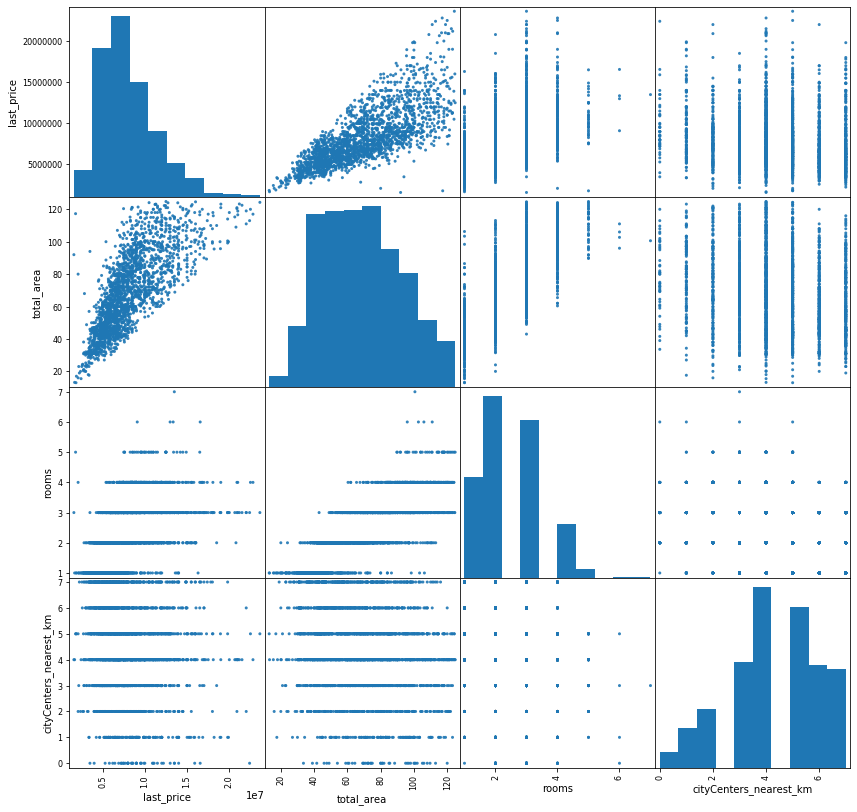

In [29]:
saint_petersburg_first = saint_petersburg_center[['last_price','total_area','rooms','cityCenters_nearest_km']]
saint_petersburg_second = saint_petersburg_center[['last_price','weekday','month','year','estimated_floor']]
pd.plotting.scatter_matrix(saint_petersburg_first,figsize=(14,14),grid=True,alpha=0.9);


<ul>
    <li>Самые дорогие помещения приходятся на 3ех комнатные , также достаточно дорогие являются 2ух и 4ех комнатые</li>
    <li>Цена напрямую зависитот площади , чем больше площадь ,тем дороже квартиры соотвественно там</li>
    <li>Самые дорогие квартиры находятся не слишком близко к центру , а примерно на среднем расстоянии</li>

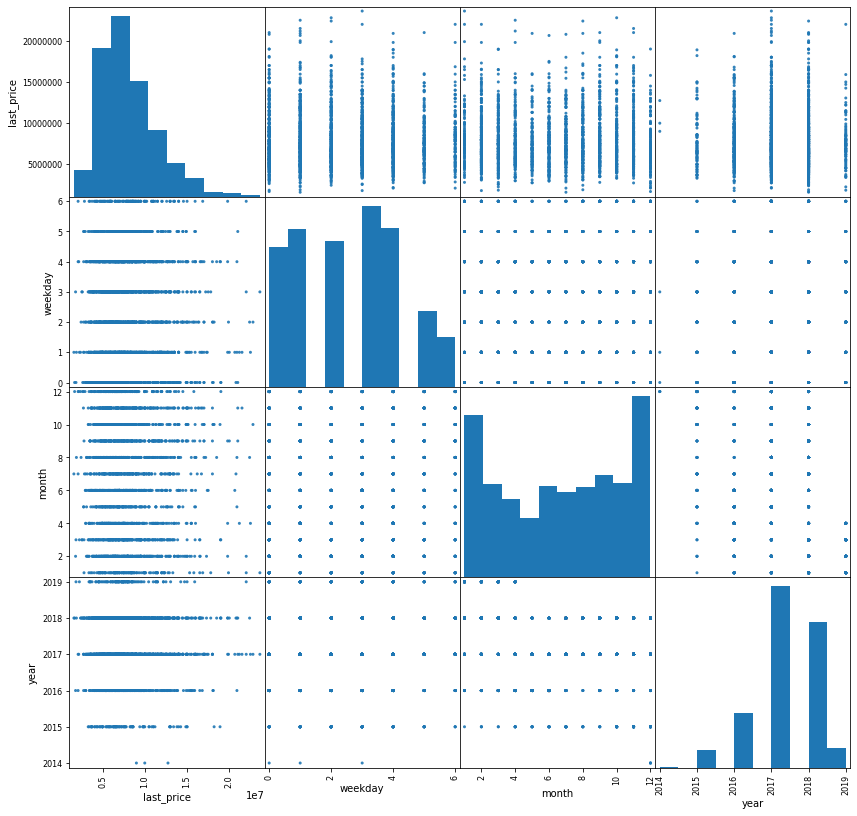

In [30]:
pd.plotting.scatter_matrix(saint_petersburg_second,figsize=(14,14),grid=True,alpha=0.9);

<ul>
    <li>чем ближе к середине неделе , тем дороже квартиры</li>
    <li>дорогие квартиры также есть и в первые месяцы года , а также ближе к концу лета и до декабря</li>
    <li>По годам самые дорогие продажи квартир пришлись на 2017-2018 года</li>

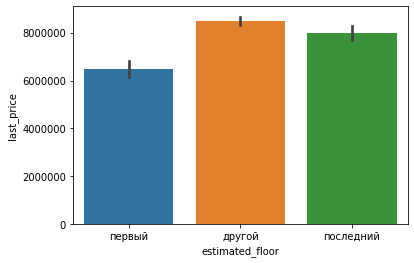

In [31]:
import seaborn as sns
sns.barplot(x='estimated_floor',y='last_price',data=saint_petersburg_second);

Стоимость этажей здесь также в пользу других , на первом и последнем также дешевле , но в Питере уже последние не так сильно отстают от других

### Шаг 5. Общий вывод

<strong>Вывод</strong>
<p>Проделали не мало чистки данных , привели данные к рабочему виду , исследовали зависимость разных данных на стоимость помещений. Многие данные имеют прямую и очевидную зависимость с ценой ,но есть такие данные ,которые имеют не такую очевидную зависимость ,но также могут иметь влияние на продажу квартиры , такие как время продажи ,где с первого взгляда нету никакой зависимости ,но проанализировав поняли в какие месяцы и в какие дни недели приходится основная масса продаж квартир и когда продаются самые дорогие из них , узнали какие годы были самые успешные. Также неоднозначное влияение оказало и количество комнат , на первый взгляд может показаться ,что чем больше комнат , тем дороже квартира,но не все так просто , можно сказать , что поднимается минимальная стоимость ,но не говорит ,что будет обязательно стоить дороже ,чем квартира с меньшим количеством. Можно выделить ,что 2-3 комнатые помещения самые выгодные для продажи , видимо , данные помещения являются самыми универсальными и удобными для большенства случаев.Можем выделить тип этажа , ведь на первом и последнем квартиры на порядок дешевле ,чем нам на <i>"других"</i>, это может быть связано с лифтом , в сл . Но однозначно самое большое влияние имеют общая площадь и близость к центру. Можно скзать ,что идеальное время продажи было с декабря 2017 на февраль 2018 в среду </p>
<h1>Выводы</h1>
<ul>
    <li>Проанализировав все данные увидели самую большую заивисимость цены от общей площади</li>
    <li>Такую же сильную зависимость можно наблюдать в расстоянии к центру Питера</li>
    <li>Количество комнат не имеет однозначной зависимости на цену квартиры</li>
    <li>В середине недели происходят самые дорогие продажи, а в начале недели происходит основная масса продаж</li>
    <li>Месяц не играет сильной роли в продаже квартиры , но можно отметить ,что в начале года и ближе к конце лета происходят самые дорогие продажи. Самое бльшое количество продаж приходится на декабрь-февральё</li>
    <li>Самыми результативными городами для продажи были 2017-2018 годы и продали самые дорогие квартиры</li>
    <li>Этажи между перывм и последним дороже</li>